# Sumário

# Imports and Configurações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets.samples_generator import make_blobs, make_circles, make_moons, make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from utils import plots
from utils.samples_generator import make_spiral, make_square, make_cubic, make_exp, make_log10

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.regularizers import l1, l2

%matplotlib inline

Using TensorFlow backend.


## Exemplos do Notebook da Intuição

In [2]:
x = np.array([[0.05, 0.10]])
y = np.array([[0.01, 0.99]])

D_in, D_out = x.shape[1], y.shape[1]

w1 = np.array([[0.15, 0.20], [0.25, 0.30]])
b1 = np.array([0.35, 0.35])
w2 = np.array([[0.40, 0.45], [0.50, 0.55]])
b2 = np.array([0.60, 0.60])

model = Sequential()
model.add(Dense(units=2, activation='sigmoid', input_shape=(D_in,), weights=[w1, b1]))
model.add(Dense(units=2, activation='sigmoid'))

model.layers[1].set_weights([w2, b2])
model.compile(optimizer=SGD(lr=0.5), loss='mse')

model.fit(x, y, batch_size=x.shape[0], epochs=1, verbose=1)

Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3037


### Exemplo 2

In [3]:
x = np.array([[0.1, 0.2, 0.7]])
y = np.array([[1, 0, 0]])
D_in, D_out = x.shape[1], y.shape[1]

w1 = np.array([[0.1, 0.2, 0.3], [0.3, 0.2, 0.7], [0.4, 0.3, 0.9]])
b1 = np.ones(3)
w2 = np.array([[0.2, 0.3, 0.5], [0.3, 0.5, 0.7], [0.6, 0.4, 0.8]])
b2 = np.ones(3)
w3 = np.array([[0.1, 0.4, 0.8], [0.3, 0.7, 0.2], [0.5, 0.2, 0.9]])
b3 = np.ones(3)

model = Sequential()
model.add(Dense(units=3, activation='relu', input_shape=(D_in,), weights=[w1, b1]))
model.add(Dense(units=3, activation='sigmoid'))
model.add(Dense(units=D_out, activation=None))

model.layers[1].set_weights([w2, b2])
model.layers[2].set_weights([w3, b3])

model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=300, verbose=0)

## Regressão

### Regressão Linear Simples - Exemplo do Perceptron

In [4]:
data = np.loadtxt('data/medidas.csv', delimiter=',', skiprows=1)
print(data.shape)

x, y = data[:,0].reshape(-1,1), data[:,1].reshape(-1,1)
print(x.shape, y.shape)

(100, 2)
(100, 1) (100, 1)


In [5]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 1.0


data_loss: 0.260894546509
[array([[ 33.68702316]], dtype=float32), array([ 74.92618561], dtype=float32)]


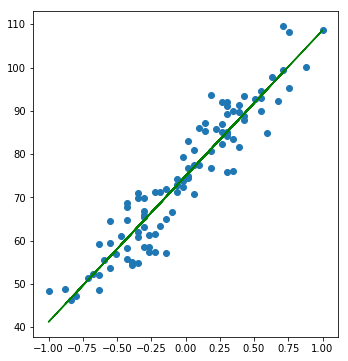

In [6]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=D_out, activation=None, input_shape=(D_in,)))

model.compile(optimizer=SGD(lr=1e-2), loss='mse')

model.fit(x, y, epochs=1000, verbose=0)

print('data_loss:', model.evaluate(x, y, batch_size=x.shape[0], verbose=0)/x.shape[0])
print(model.layers[0].get_weights())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, model.predict(x), c='green')

### Regressão Linear Multivariada - Exercício de Regressão do Perceptron

In [7]:
data = np.loadtxt('data/notas.csv', delimiter=',', skiprows=1)
print(data.shape)

x, y = data[:,:-1], data[:,-1].reshape(-1,1)
print(x.shape, y.shape)

(25, 4)
(25, 3) (25, 1)


In [8]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1. -1. -1.] [ 1.  1.  1.]


In [9]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=D_out, activation=None, input_shape=(D_in,)))

model.compile(optimizer=SGD(lr=1e-1), loss='mse')

model.fit(x, y, batch_size=x.shape[0], epochs=2000, verbose=0)

print('data_loss:', model.evaluate(x, y, batch_size=x.shape[0], verbose=0)/x.shape[0])
print(model.layers[0].get_weights())

data_loss: 0.229512481689
[array([[  8.72418594],
       [ 14.10317802],
       [ 26.26603699]], dtype=float32), array([ 150.65150452], dtype=float32)]


### Regressão Quadrática

In [10]:
x, y = make_square(n_samples=100, x_min=-10, x_max=10, a=1, b=1, c=1, noise=10)

print(x.shape, y.shape)

(100, 1) (100, 1)


In [11]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1.] [ 1.]


data_loss: 0.328806266785


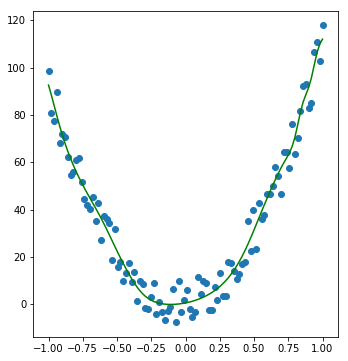

In [12]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=10, activation='tanh', input_shape=(D_in,)))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=D_out, activation=None))

model.compile(optimizer=SGD(lr=1e-3), loss='mse')

model.fit(x, y, batch_size=x.shape[0], epochs=10000, verbose=0)

print('data_loss:', model.evaluate(x, y, batch_size=x.shape[0], verbose=0)/x.shape[0])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, model.predict(x), c='green')

### Regressão Cúbica

In [13]:
x, y = make_cubic(n_samples=100, x_min=-4, x_max=4, a=1, b=0, c=-10, d=0, noise=3)

print(x.shape, y.shape)

(100, 1) (100, 1)


In [14]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1.] [ 1.]


data_loss: 0.0258021020889


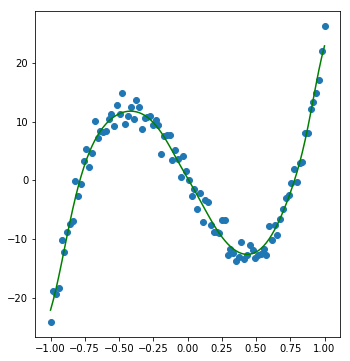

In [15]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=10, activation='tanh', input_shape=(D_in,)))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=D_out, activation=None))

model.compile(optimizer=SGD(lr=1e-3), loss='mse')

model.fit(x, y, batch_size=x.shape[0], epochs=10000, verbose=0)

print('data_loss:', model.evaluate(x, y, batch_size=x.shape[0], verbose=0)/x.shape[0])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, model.predict(x), c='green')

### Regressão Logarítimica

In [16]:
x, y = make_log10(n_samples=100, x_min=1, x_max=100, noise=0.3)

print(x.shape, y.shape)

(100, 1) (100, 1)


In [17]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1.] [ 1.]


data_loss: 0.000909133702517


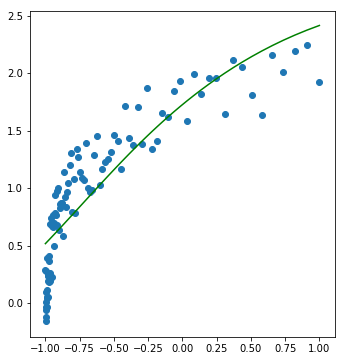

In [18]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=10, activation='tanh', input_shape=(D_in,)))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=D_out, activation=None))

model.compile(optimizer=SGD(lr=1e-3), loss='mse')

model.fit(x, y, batch_size=x.shape[0], epochs=10000, verbose=0)

print('data_loss:', model.evaluate(x, y, batch_size=x.shape[0], verbose=0)/x.shape[0])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, model.predict(x), c='green')

### Regressão Exponencial

In [19]:
x, y = make_exp(n_samples=100, x_min=0, x_max=5, noise=10)

print(x.shape, y.shape)

(100, 1) (100, 1)


In [20]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1.] [ 1.]


data_loss: 0.289688835144


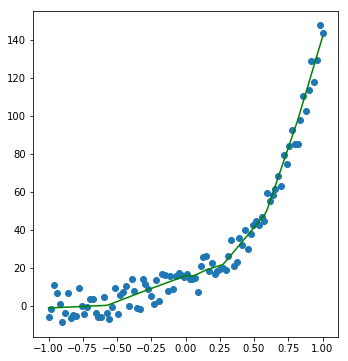

In [21]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(D_in,)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=D_out, activation=None))

model.compile(optimizer=SGD(lr=1e-3), loss='mse')

model.fit(x, y, batch_size=x.shape[0], epochs=10000, verbose=0)

print('data_loss:', model.evaluate(x, y, batch_size=x.shape[0], verbose=0)/x.shape[0])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, model.predict(x), c='green')

## Classificação Binária

### Porta AND/OR

In [22]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1]).reshape(-1, 1)

print(x.shape, y.shape)

(4, 2) (4, 1)


data_loss: 0.000860524363816
[array([[ 10.67684174],
       [ 10.67684174]], dtype=float32), array([-16.18433571], dtype=float32)]
Predições:
[[  9.35906073e-08]
 [  4.03987290e-03]
 [  4.03987290e-03]
 [  9.94343877e-01]]
Acurácia: 100.00%


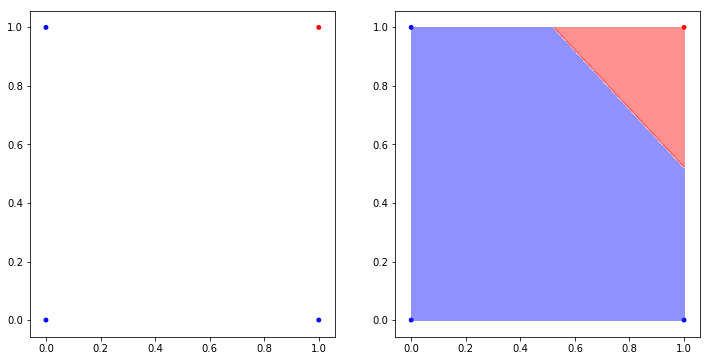

In [23]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=D_out, activation='sigmoid', input_shape=(D_in,)))

model.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=5000, verbose=0)

print('data_loss:', model.evaluate(x, y, batch_size=x.shape[0], verbose=0)/x.shape[0])

print(model.layers[0].get_weights())

y_pred = model.predict(x)
print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### Porta XOR

In [24]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)

print(x.shape, y.shape)

(4, 2) (4, 1)


Predições:
[[ 0.00194559]
 [ 0.99820185]
 [ 0.9973309 ]
 [ 0.00168374]]
Acurácia: 100.00%


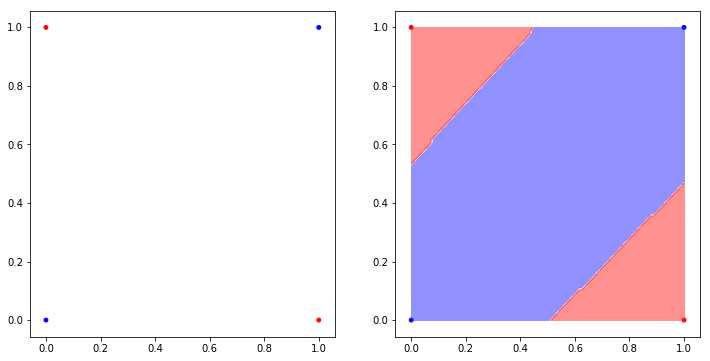

In [25]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=2, activation='sigmoid', input_shape=(D_in,)))
model.add(Dense(units=D_out, activation='sigmoid'))

model.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=5000, verbose=0)

y_pred = model.predict(x)
print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### 2 Clusters

In [26]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(100, 2) (100, 1)


Acurácia: 100.00%


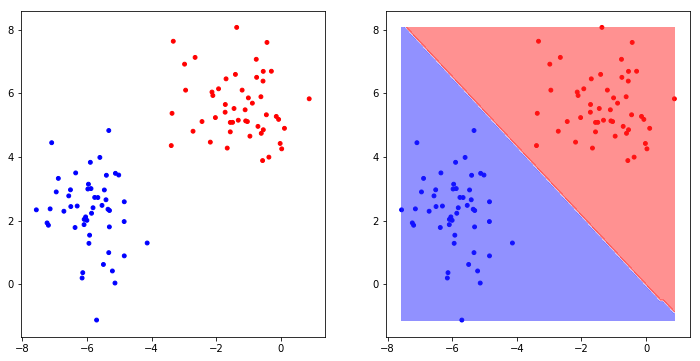

In [27]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=D_out, activation='sigmoid', input_shape=(D_in,)))

model.compile(optimizer=SGD(lr=1e-2), loss='binary_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=5000, verbose=0)

y_pred = model.predict(x)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### 4 Clusters

In [28]:
x, y = make_blobs(n_samples=500, n_features=2, cluster_std=0.9, centers=[(-3, -3), (3, 3), (-3, 3), (3, -3)], random_state=1234)
y = y.reshape(-1, 1)
y = np.where(y >= 2, 1, 0)

print(x.shape, y.shape)

(500, 2) (500, 1)


Acurácia: 100.00%


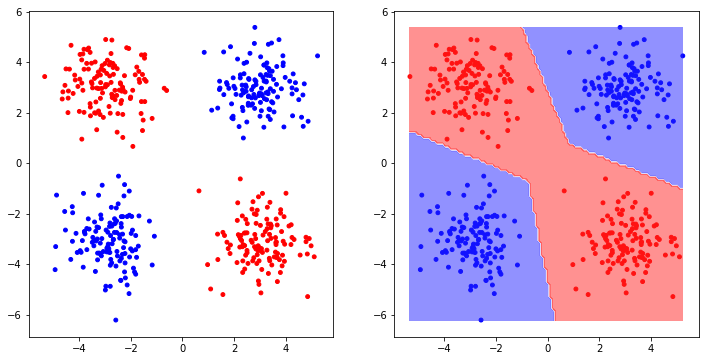

In [29]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=4, activation='relu', input_shape=(D_in,)))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=D_out, activation='sigmoid'))

model.compile(optimizer=SGD(lr=1e-2), loss='binary_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=5000, verbose=0)

y_pred = model.predict(x)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### Círculos

In [30]:
x, y = make_circles(n_samples=500, noise=0.1, factor=0.4, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(500, 2) (500, 1)


Acurácia: 99.40%


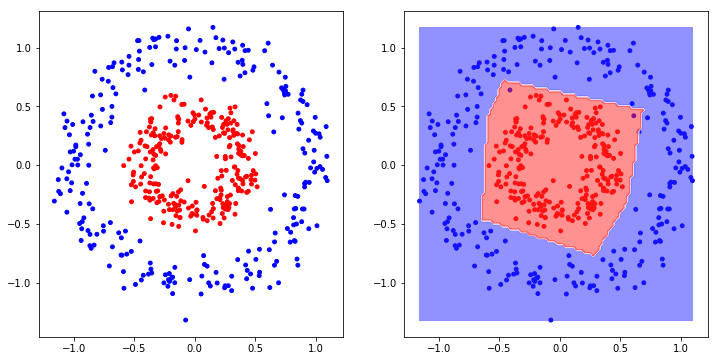

In [31]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=5, activation='relu', input_shape=(D_in,)))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=D_out, activation='sigmoid'))

model.compile(optimizer=SGD(lr=1e-2), loss='binary_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=10000, verbose=0)

y_pred = model.predict(x)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### Moons

In [32]:
x, y = make_moons(200, noise=0.20)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(200, 2) (200, 1)


Acurácia: 96.00%


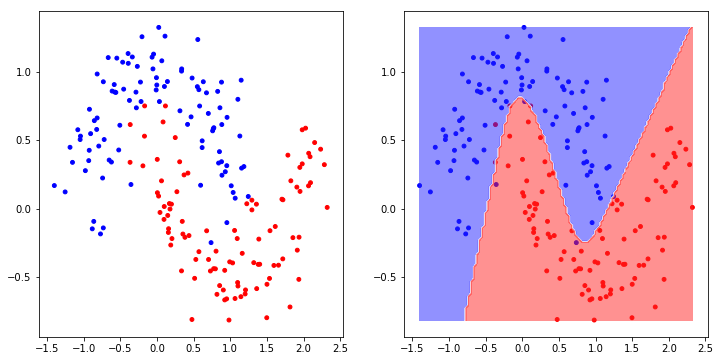

In [33]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=3, activation='tanh', input_shape=(D_in,)))
model.add(Dense(units=D_out, activation='sigmoid'))

model.compile(optimizer=SGD(lr=1e-1), loss='binary_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=20000, verbose=0)

y_pred = model.predict(x)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### Espiral

In [34]:
x, y = make_spiral(n_samples=100, n_class=2, radius=5, laps=1.75)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(200, 2) (200, 1)


Acurácia: 96.50%


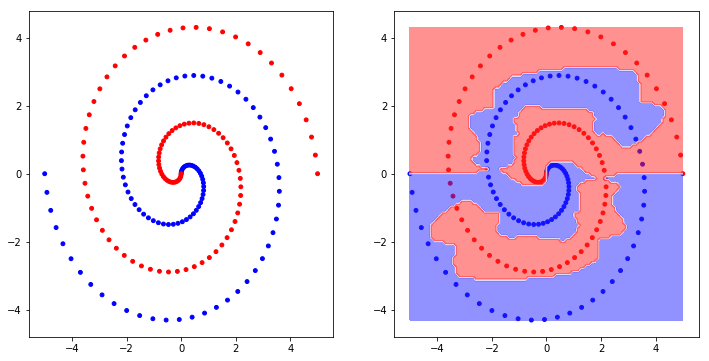

In [35]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=8, activation='tanh', input_shape=(D_in,)))
model.add(Dense(units=20, activation='tanh'))
model.add(Dense(units=D_out, activation='sigmoid'))

model.compile(optimizer=SGD(lr=1e-1), loss='binary_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=20000, verbose=0)

y_pred = model.predict(x)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

## Classificação Multiclasse

### 3 Clusters Multiclasse

In [36]:
x, y = make_blobs(n_samples=300, n_features=2, centers=[(0, -3), (-3, 3), (3, 3)], random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(300, 2) (300, 1)


In [37]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::60])

[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]]


[array([[ 0.77628583,  0.18749791],
       [ 0.25103053, -0.72071326]], dtype=float32), array([ 1.60801661,  2.778934  ], dtype=float32)]
[array([[-0.20713711, -0.46782005,  0.67495686],
       [ 0.64530146, -0.49294859, -0.15235239]], dtype=float32), array([-1.0035032 ,  1.99998713, -0.99649358], dtype=float32)]
Acurácia: 100.00%


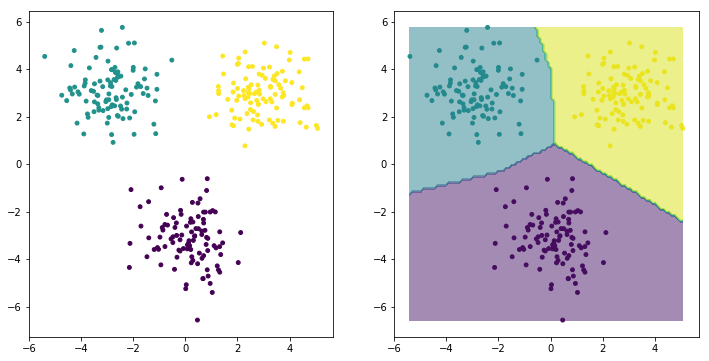

In [38]:
D_in, D_out = x.shape[1], y_onehot.shape[1]

model = Sequential()
model.add(Dense(units=2, activation='relu', input_shape=(D_in,), kernel_regularizer=l2(0.1)))
model.add(Dense(units=D_out, activation='softmax', kernel_regularizer=l2(0.1)))

model.compile(optimizer=SGD(lr=1e-2), loss='categorical_crossentropy')

model.fit(x, y_onehot, batch_size=x.shape[0], epochs=10000, verbose=0)

for layer in model.layers:
    print(layer.get_weights())
    
y_pred = np.argmax(model.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=False, nn=model)

### 4 Clusters Multiclasse

In [39]:
x, y = make_blobs(n_samples=400, n_features=2, centers=[(-3, 0), (3, 0), (0, 3), (0, -3)], random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(400, 2) (400, 1)


In [40]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::70])

[[ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]]


Acurácia: 96.50%


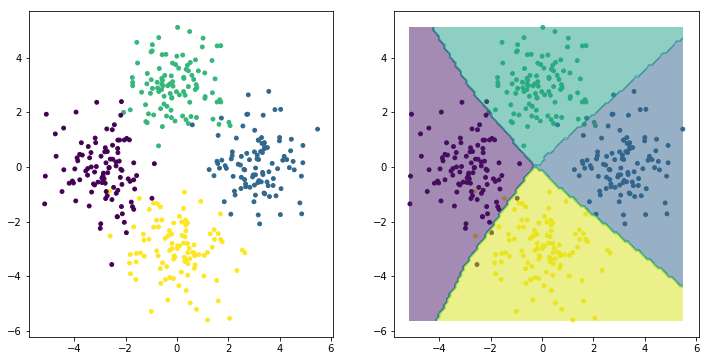

In [41]:
D_in, D_out = x.shape[1], y_onehot.shape[1]

model = Sequential()
model.add(Dense(units=3, activation='relu', input_shape=(D_in,)))
model.add(Dense(units=D_out, activation='softmax'))

model.compile(optimizer=SGD(lr=1e-2), loss='categorical_crossentropy')

model.fit(x, y_onehot, batch_size=x.shape[0], epochs=10000, verbose=0)

y_pred = np.argmax(model.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=False, nn=model)

### Espiral - 5 Classes

In [42]:
x, y = make_spiral(n_samples=100, n_class=5, radius=1, laps=0.5)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(500, 2) (500, 1)


In [43]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::100])

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


Acurácia: 99.00%


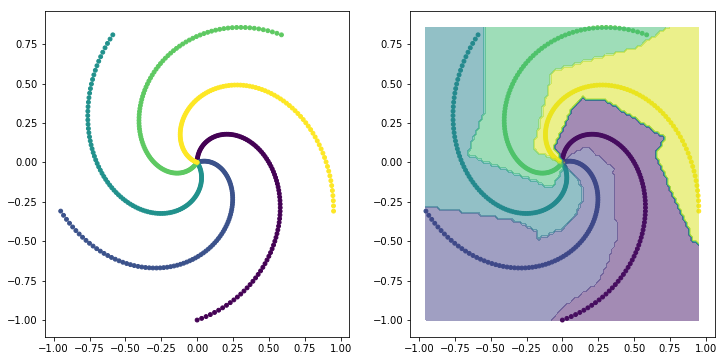

In [44]:
D_in, D_out = x.shape[1], y_onehot.shape[1]

model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(D_in,)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=D_out, activation='softmax'))

model.compile(optimizer=SGD(lr=1e-1), loss='categorical_crossentropy')

model.fit(x, y_onehot, batch_size=x.shape[0], epochs=10000, verbose=0)

y_pred = np.argmax(model.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=False, nn=model)

### Make Classification - 4 Classes

In [45]:
x, y = make_classification(n_samples=100, n_classes=4, n_features=2, n_clusters_per_class=1, n_redundant=0, n_repeated=0, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(100, 2) (100, 1)


In [46]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::10])

[[ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]]


Acurácia: 93.00%


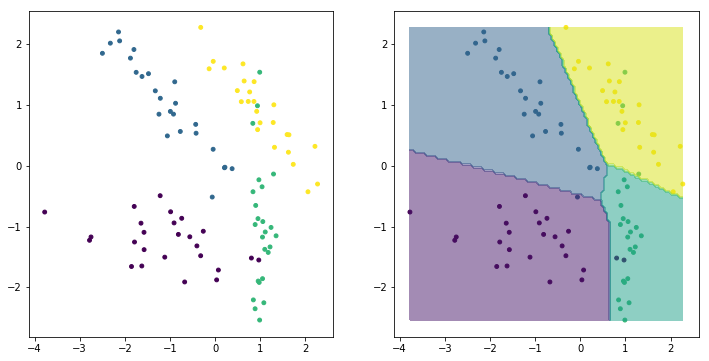

In [47]:
D_in, D_out = x.shape[1], y_onehot.shape[1]

model = Sequential()
model.add(Dense(units=5, activation='relu', input_shape=(D_in,)))
model.add(Dense(units=D_out, activation='softmax'))

model.compile(optimizer=SGD(lr=1e-2), loss='categorical_crossentropy')

model.fit(x, y_onehot, batch_size=x.shape[0], epochs=10000, verbose=0)

y_pred = np.argmax(model.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=False, nn=model)

### Iris Dataset

In [48]:
data = load_iris()
x, y = data.data[:, 2:], data.target.reshape(-1,1)

print(data.feature_names)
print(data.target_names)
print(x.shape, y.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 2) (150, 1)


In [49]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::20])

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]


Acurácia: 95.33%


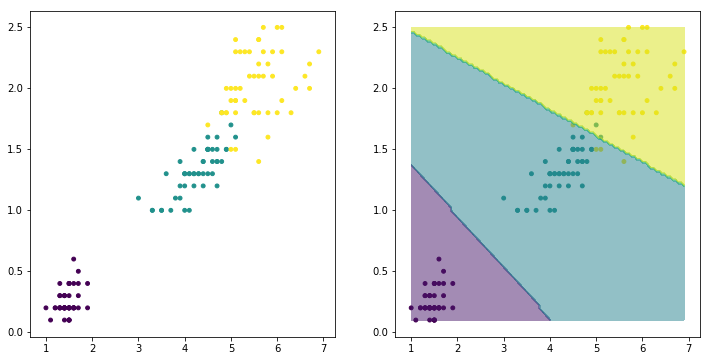

In [50]:
D_in, D_out = x.shape[1], y_onehot.shape[1]

model = Sequential()
model.add(Dense(units=2, activation=None, input_shape=(D_in,)))
model.add(Dense(units=D_out, activation='softmax'))

model.compile(optimizer=SGD(lr=1e-2), loss='categorical_crossentropy')

model.fit(x, y_onehot, batch_size=x.shape[0], epochs=10000, verbose=0)

y_pred = np.argmax(model.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=False, nn=model)

# Referências

- [Tensorflow Playground](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.94880&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

- [Implementing Neural Network L1 Regularization](https://jamesmccaffrey.wordpress.com/2017/06/27/implementing-neural-network-l1-regularization/)

- [Linear Classification](http://cs231n.github.io/linear-classify/)